In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Wed Feb 28 18:08:19 2024


In [2]:
df = pd.read_csv("/content/Final Depression Data - Dataset-Mental-Disorders.csv") # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)

(120, 18)

In [3]:
df.head(10)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,2,4,3,3,1,1,0,0,1,0,0,1,1,1,3,3,4,1
1,2,4,2,3,0,1,0,0,0,0,0,0,0,0,4,2,5,2
2,3,1,3,3,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,2,4,2,1,1,1,1,0,1,0,0,0,0,0,3,2,2,1
4,2,2,3,3,0,0,0,0,0,0,0,1,1,1,5,5,6,0
5,2,3,3,1,0,1,1,1,0,0,0,0,1,0,3,5,5,2
6,4,2,4,3,1,1,1,0,1,1,0,1,1,1,7,2,9,1
7,2,3,3,3,0,0,0,0,1,0,0,0,0,1,5,5,5,0
8,1,4,1,2,1,1,1,0,1,1,0,1,0,0,8,2,3,1
9,2,4,1,3,0,0,0,0,1,0,0,1,1,1,3,4,2,2


In [6]:
df['Expert Diagnose'].value_counts()

1    59
2    31
0    30
Name: Expert Diagnose, dtype: int64

In [7]:
df['Expert Diagnose'].value_counts(normalize=True)

1    0.491667
2    0.258333
0    0.250000
Name: Expert Diagnose, dtype: float64

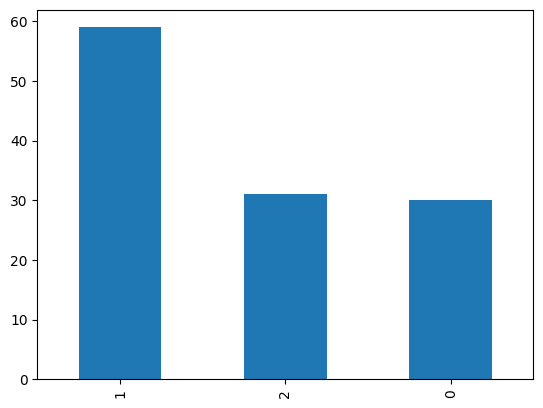

In [8]:
df['Expert Diagnose'].value_counts().plot(kind="bar");

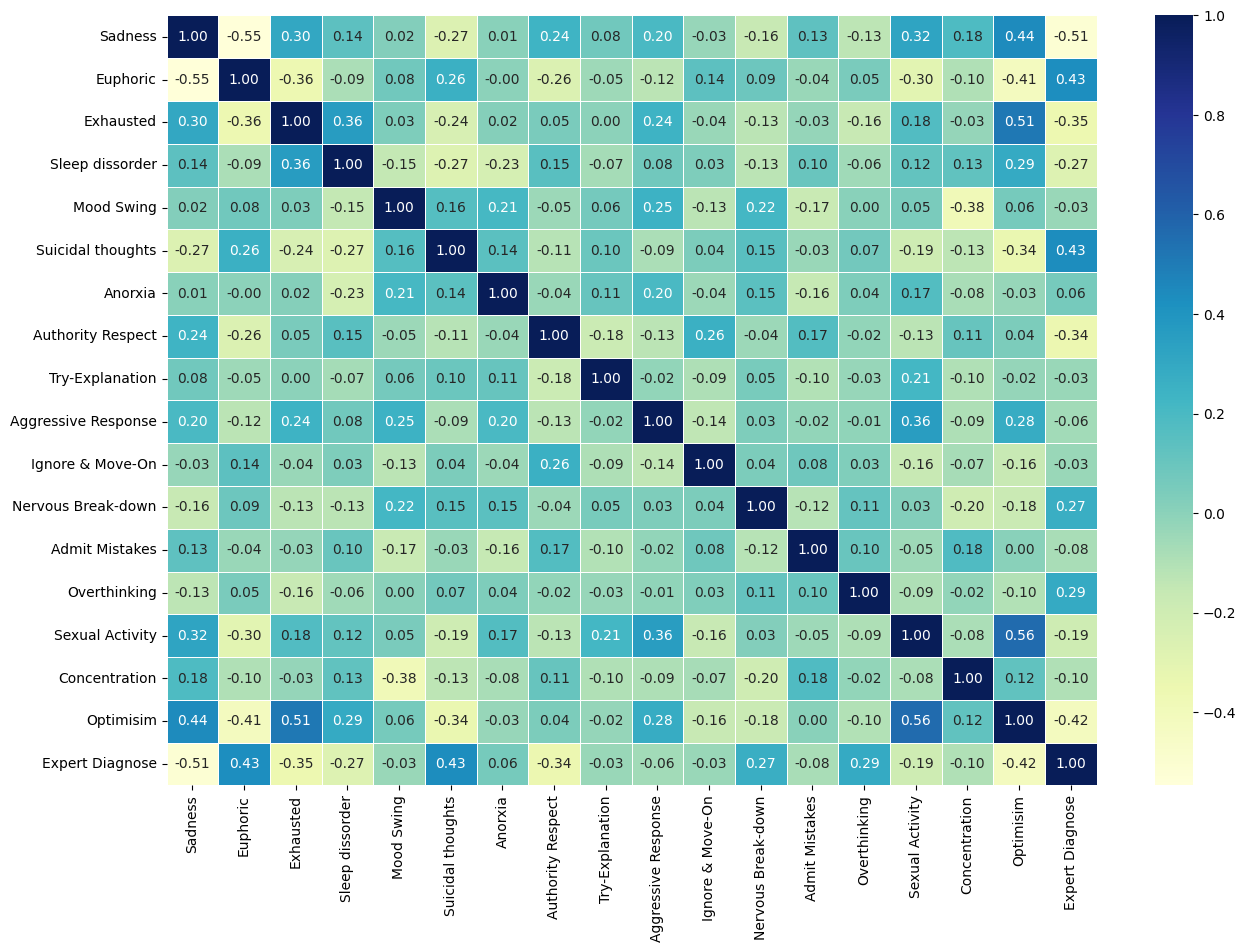

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

In [10]:
X = df.drop("Expert Diagnose", axis=1)

# Target variable
y = df['Expert Diagnose'].values

In [11]:
X.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
0,2,4,3,3,1,1,0,0,1,0,0,1,1,1,3,3,4
1,2,4,2,3,0,1,0,0,0,0,0,0,0,0,4,2,5
2,3,1,3,3,1,0,0,0,1,1,0,1,1,0,6,5,7
3,2,4,2,1,1,1,1,0,1,0,0,0,0,0,3,2,2
4,2,2,3,3,0,0,0,0,0,0,0,1,1,1,5,5,6


In [12]:
y

array([1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 0])

In [13]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [14]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [15]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.75,
 'Logistic Regression': 0.8333333333333334,
 'Random Forest': 0.7916666666666666}

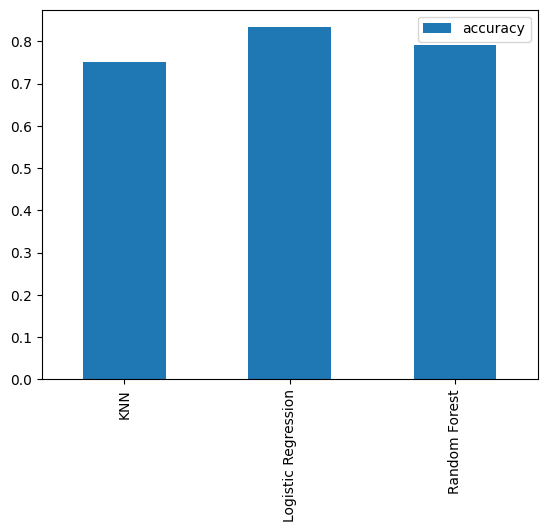

In [16]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [17]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [18]:
train_scores

[1.0,
 0.7916666666666666,
 0.8541666666666666,
 0.7708333333333334,
 0.8229166666666666,
 0.7708333333333334,
 0.78125,
 0.8020833333333334,
 0.7916666666666666,
 0.8020833333333334,
 0.8125,
 0.7916666666666666,
 0.8020833333333334,
 0.78125,
 0.75,
 0.7291666666666666,
 0.7604166666666666,
 0.7291666666666666,
 0.7291666666666666,
 0.71875]

Maximum KNN score on the test data: 75.00%


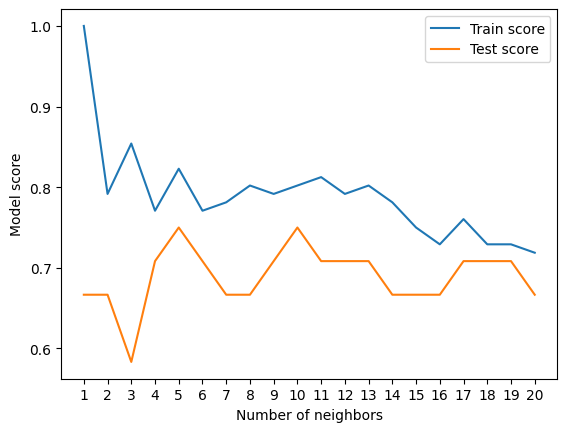

In [19]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [20]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [21]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [22]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1438.44988828766}

In [23]:
rs_log_reg.score(X_test, y_test)

0.9166666666666666

In [24]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [25]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [26]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8333333333333334

In [27]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [28]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 1438.44988828766, 'solver': 'liblinear'}

In [29]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.9166666666666666

In [30]:
gs_log_reg.best_params_

{'C': 1438.44988828766, 'solver': 'liblinear'}

In [31]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=1438.44988828766,
                         solver="liblinear")

In [32]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.91666667, 1.        , 0.875     , 0.91666667, 0.875     ])

In [33]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9166666666666666

In [35]:
clf.fit(X_train, y_train);

In [36]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'Sadness': 2.5272699465036603,
 'Euphoric': -2.977510492980135,
 'Exhausted': 3.045305711792076,
 'Sleep dissorder': 2.209014667026119,
 'Mood Swing': -14.49276377099932,
 'Suicidal thoughts': -13.35978980947586,
 'Anorxia': -2.3555308376355875,
 'Authority Respect': 2.6056508790238944,
 'Try-Explanation': 2.518174504339106,
 'Aggressive Response': -7.104714281329802,
 'Ignore & Move-On': 3.7527191413899312,
 'Nervous Break-down': -8.966748215722328,
 'Admit Mistakes': 4.194183830114395,
 'Overthinking': -2.797501017542953,
 'Sexual Activity': -0.47019825708834767,
 'Concentration': 0.8888025813809557,
 'Optimisim': -0.3641999972941462}

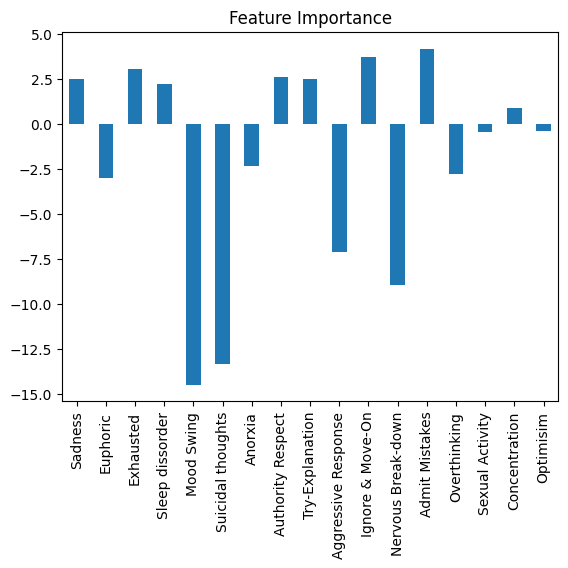

In [38]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);